In [6]:
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import shutil
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential

In [3]:
categories = ['Decks', 'Pavements', 'Walls']
data_path = '../dataset'

def undersample_data(directory):
    cracked = os.listdir(os.path.join(directory, 'Cracked'))
    non_cracked = os.listdir(os.path.join(directory, 'Non-cracked'))

    # Determine the number of samples to be removed
    num_to_remove = len(non_cracked) - len(cracked)

    # Randomly select non-cracked images for removal
    to_remove = np.random.choice(non_cracked, num_to_remove, replace=False)

    for file in to_remove:
        os.remove(os.path.join(directory, 'Non-cracked', file))

# Apply undersampling for each category
for category in categories:
    undersample_data(os.path.join(data_path, category))

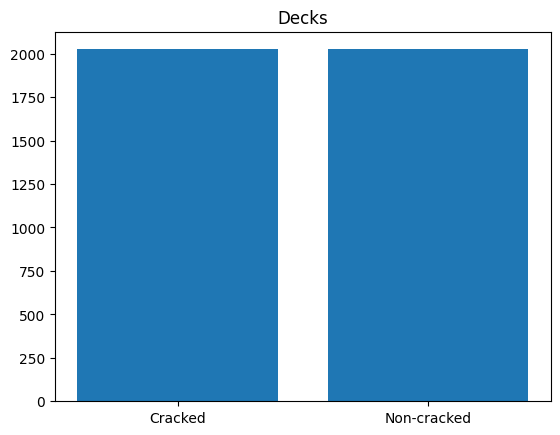

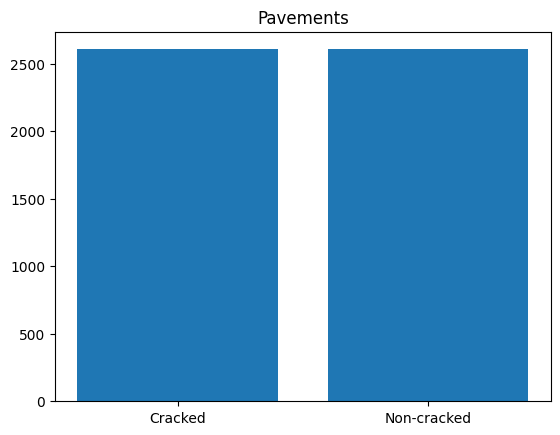

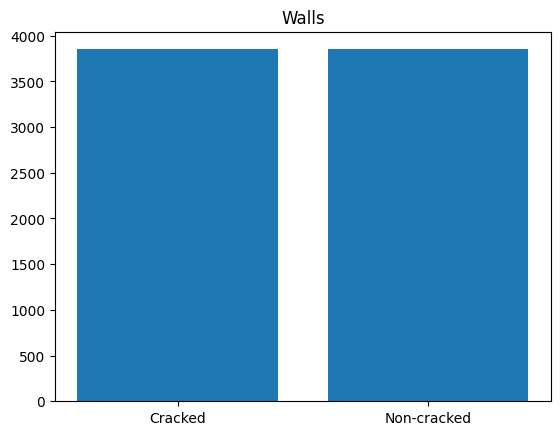

In [4]:
def plot_counts(directory):
    cracked_count = len(os.listdir(os.path.join(directory, 'Cracked')))
    non_cracked_count = len(os.listdir(os.path.join(directory, 'Non-cracked')))
    
    plt.bar(['Cracked', 'Non-cracked'], [cracked_count, non_cracked_count])
    plt.title(directory.split('/')[-1])
    plt.show()

for category in ['Decks', 'Pavements', 'Walls']:
    plot_counts(os.path.join(data_path, category))
    print('')

In [7]:
base_path = '../dataset'
new_dataset_path = '../combined_dataset'
categories = ['Decks', 'Pavements', 'Walls']
statuses = ['Cracked', 'Non-cracked']

# Create new directories for Cracked and Non-cracked if they don't exist
os.makedirs(os.path.join(new_dataset_path, 'Cracked'), exist_ok=True)
os.makedirs(os.path.join(new_dataset_path, 'Non-cracked'), exist_ok=True)

# Iterate over each category and status to move images
for category in categories:
    for status in statuses:
        source_path = os.path.join(base_path, category, status)
        target_path = os.path.join(new_dataset_path, status)
        
        # Get a list of all files in the directory
        for filename in os.listdir(source_path):
            file_path = os.path.join(source_path, filename)
            
            # Ensure it's a file
            if os.path.isfile(file_path):
                # Construct a new filename to avoid collisions
                new_filename = f"{category}_{filename}"
                shutil.copy(file_path, os.path.join(target_path, new_filename))

print("Files have been combined!")

Files have been combined!
